<a href="https://colab.research.google.com/github/prasanth172/PRASANTHNM/blob/main/DATA%20ANALYTIC3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

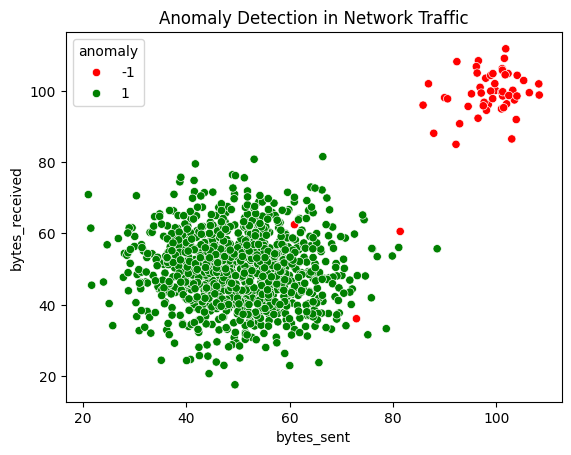

Anomaly counts:
anomaly
 1    997
-1     53
Name: count, dtype: int64


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Simulate or load network traffic data
# (You can replace this with real network data)
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=10, size=(1000, 4))  # normal traffic
anomaly_data = np.random.normal(loc=100, scale=5, size=(50, 4))   # anomalous traffic
data = np.vstack((normal_data, anomaly_data))
df = pd.DataFrame(data, columns=['duration', 'bytes_sent', 'bytes_received', 'packet_count'])

# Step 2: Preprocessing (scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: Anomaly Detection using Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly'] = model.fit_predict(scaled_data)

# Step 4: Visualize results
sns.scatterplot(x='bytes_sent', y='bytes_received', hue='anomaly', data=df, palette={1: 'green', -1: 'red'})
plt.title('Anomaly Detection in Network Traffic')
plt.show()

# Step 5: Count anomalies
print("Anomaly counts:")
print(df['anomaly'].value_counts())
